In [35]:
# Purely statical model
# based on baye theorm and used for classification

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [37]:
wine_df = pd.read_csv(r"D:\machine learning using python\jupyter notebook code\Data science\data\wine.csv")

In [38]:
wine_df.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [39]:
wine_df.shape

(178, 14)

In [40]:
from sklearn.naive_bayes import GaussianNB

In [41]:
wine_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Wine,178.0,1.938202,0.775035,1.00,1.0000,2.000,3.0000,3.00
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic.acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Acl,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Mg,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoid.phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanth,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58


In [42]:
wine_df.dtypes

Wine                      int64
Alcohol                 float64
Malic.acid              float64
Ash                     float64
Acl                     float64
Mg                        int64
Phenols                 float64
Flavanoids              float64
Nonflavanoid.phenols    float64
Proanth                 float64
Color.int               float64
Hue                     float64
OD                      float64
Proline                   int64
dtype: object

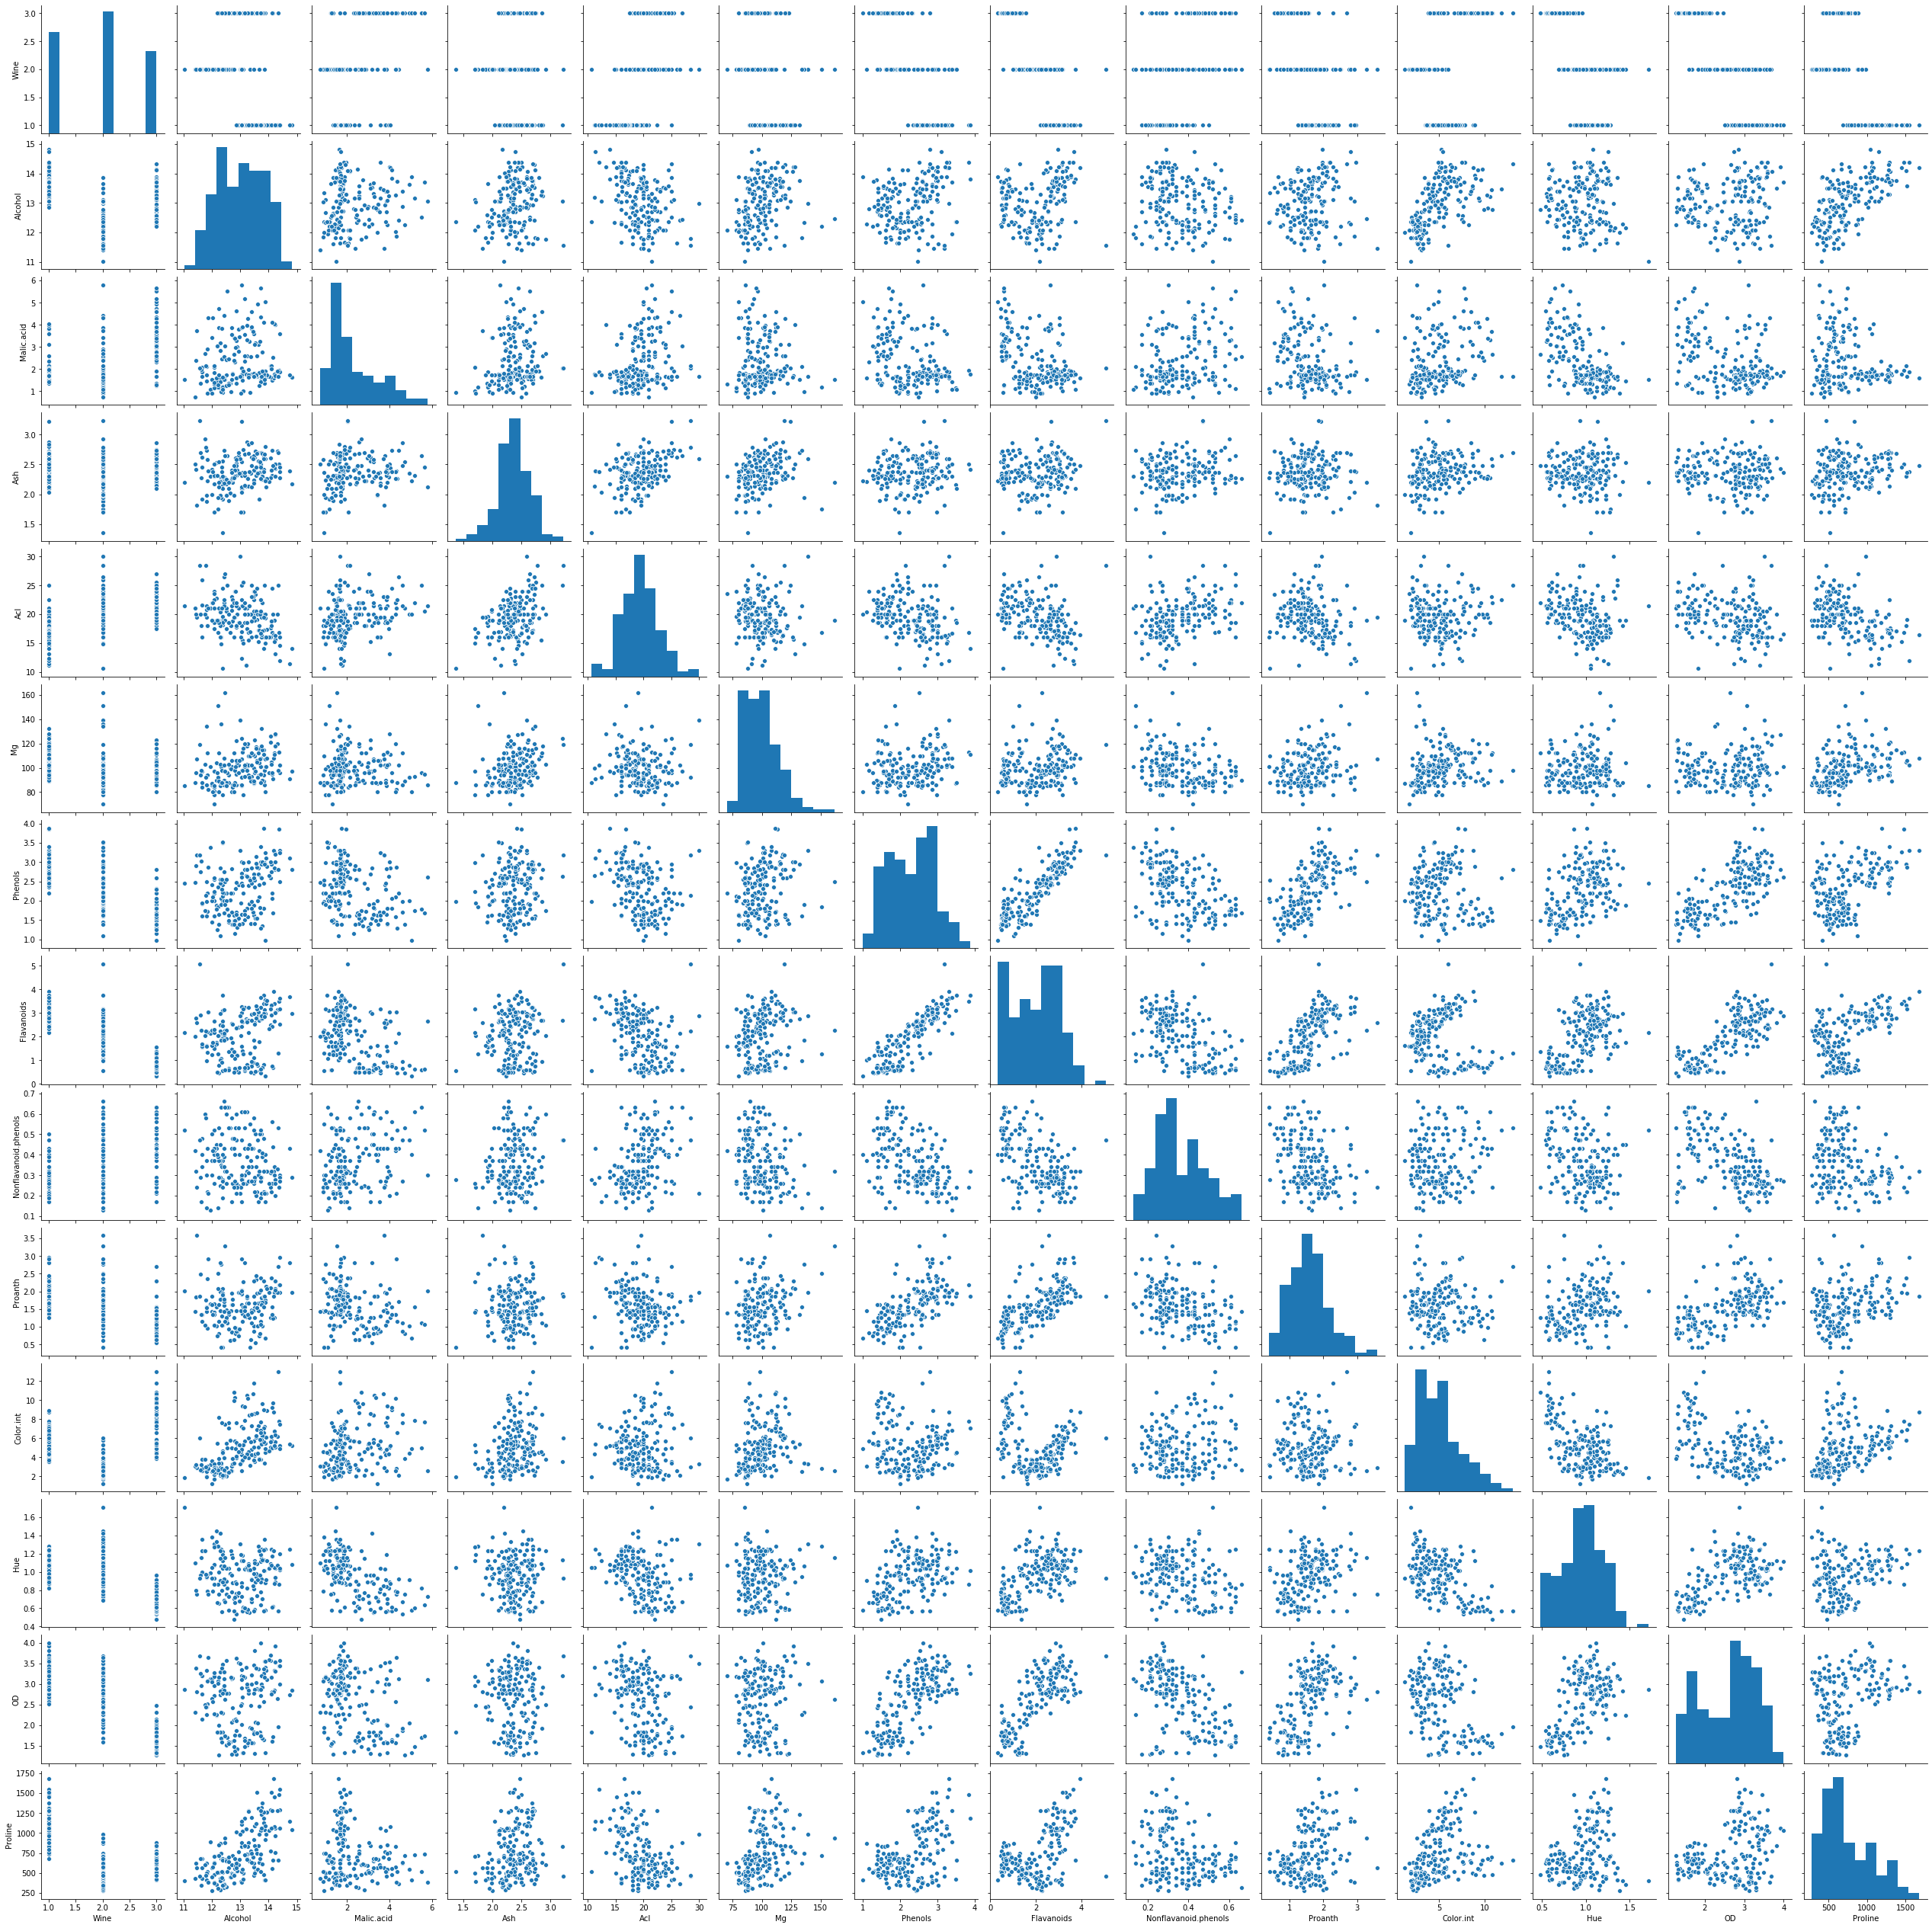

In [43]:
sns.pairplot(wine_df)
plt.show()

In [44]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [45]:
X = wine_df.drop('Wine', axis=1)

In [46]:
Y = wine_df.pop('Wine')

In [47]:
X.shape, Y.shape

((178, 13), (178,))

In [48]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

In [49]:
model = GaussianNB()

In [50]:
model.fit(X_train, Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [51]:
acc = model.score(X_train, Y_train)

In [52]:
print("training accuracy : ", acc)

training accuracy :  0.9758064516129032


In [53]:
test_pred = model.predict(X_test)

In [57]:
print(metrics.classification_report(Y_test, test_pred))


              precision    recall  f1-score   support

           1       0.96      1.00      0.98        23
           2       1.00      0.95      0.97        19
           3       1.00      1.00      1.00        12

    accuracy                           0.98        54
   macro avg       0.99      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



In [56]:
print(metrics.confusion_matrix(Y_test, test_pred))

[[23  0  0]
 [ 1 18  0]
 [ 0  0 12]]
